In [1]:
import pandas as pd
import glob
import numpy as np
import json
import math
from natsort import natsorted

In [2]:
data = pd.read_json("/home/ravi/raviProject/DATA/Annotate/remaining_V5.json", orient='records')

In [3]:
data.shape

(2251110, 5)

In [5]:
data.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
0,1625601315,Jen Psaki Warns Americans: ‘We Will Be Going D...,1625604365,FK off commie,TheTrumpRepublicans.json
1,1677992459,Because being mayor wasn't.,1677995455,Good server at a homeless shelter,ResisttheMainstream.json
2,1681423089,Going live now with @catturd2 tune in and ch...,1681485068,good day to all.,DonaldTrumpJr.json
3,1702760024,S a d l y T r u m p i s e i t h e r u ...,1702773525,"Sorry buddy, but religious ""fanatics"" of ANY r...",ThePatriotVoice.json
4,1641020167,I l i k e c o f f e e i n c o n c e p t,1641020222,kek,LacansWhreHouse.json


In [6]:
df = data.copy()

In [7]:
# Assuming df is your DataFrame
shuffled_df = df.sample(frac=1, random_state=42)  # Shuffle the DataFrame

# Sample a fraction of the DataFrame
sampled_df = shuffled_df.sample(n=100000, replace=False, random_state=42)

In [8]:
sampled_df.shape

(100000, 5)

In [9]:
sampled_df.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
616027,1677869084,,1677869167,But CIVIL WAR will happen 1st,ResisttheMainstream.json
1410665,1652417709,"​ With Baby Formula Shortage, Pete Buttigieg F...",1652904626,His kids are at least a yr old now.,TrumpSupportersChannel.json
828345,1680718485,You don’t have to choose between what you buy ...,1680720428,Good post,DonaldTrumpJr.json
1303664,1658959141,"I s i t j u s t m e , o r d o e s ...",1658959618,🤣,ThePatriotVoice.json
797643,1694116233,Greg Gutfeld Predicts Ex-Dem Tulsi Gabbard Wil...,1694179761,No no no,TheTrumpRepublicans.json


In [10]:
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V6_100K.json', orient='records')

In [11]:
# sampled_df=pd.read_json('/home/ravi/raviProject/DATA/Annotate/sampled_V1.json', orient='records')
# # Save DataFrame as JSONL (JSON Lines)
# with open('/home/ravi/raviProject/DATA/Annotate/sampled_V1.jsonl', 'w') as f:
#     sampled_df.to_json(f, orient='records', lines=True)

In [12]:
remaining_df = shuffled_df.drop(sampled_df.index)

In [13]:
remaining_df.shape

(2151110, 5)

In [14]:
remaining_df.to_json('/home/ravi/raviProject/DATA/Annotate/remaining_V6.json', orient='records')

In [15]:
remaining_df.head(5)

,msgDate,msg,replyDate,reply,telegramChannel
2144695,1621531185,Coming to your city!! Pay attention. \n,1621532425,We Trump back right now,AnalyzingAmerica.json
664545,1666120220,,1666121082,cool 😀,DonaldTrumpJr.json
494190,1685195242,Major US Retailers Warn the Shoplifting Epidem...,1685199145,We in uk are encountering shoplifting on a gro...,TheTrumpRepublicans.json
2001645,1620231265,#AlexJonesShow LIVE: UN Announces Criminal Pl...,1620232443,Whoever talks about Covid-19 as a deadly disea...,InfoWars.json
69970,1650756035,W o u l d y o u ?,1650807458,Hello guys,AnalyzingAmerica.json


# sample ~100 per class wrt model predictions

In [22]:
df = pd.read_json('/home/ravi/raviProject/DATA/Annotate/sampled_V4_10K_yPred_RoBERTa.json', orient='records')

In [23]:
df['y_pred'].value_counts()

0    9141
2     447
1     412
Name: y_pred, dtype: int64

In [24]:
df.head()

,msgDate,msg,replyDate,text,telegramChannel,y_pred
0,1680358500,Fetterman Does First Post-Depression Interview...,1680359913,He should not be paid for the time he was in t...,TheTrumpRepublicans.json,0
1,1628525284,Imagine that!\n,1628723143,I love 💗 you trump you will be come back 😘😘😘😘😘...,AnalyzingAmerica.json,0
2,1631810764,The Left Discovers It Loves Evictions as Flori...,1632184529,🖕🏽,TheTrumpRepublicans.json,0
3,1650828645,Clinton stuck her foot in her mouth.\n,1650828832,Open mouth and insert foot,AnalyzingAmerica.json,0
4,1679148015,🔴 Resurfaced Clip of Trans HHS Official Circul...,1679323732,This guy is disgusting 🤮,ResisttheMainstream.json,0


In [25]:
# Sample 100 rows with class 1
sample_class_1 = df[df['y_pred'] == 0].sample(n=447, random_state=42)

# Sample 200 rows with class 2
sample_class_2 = df[df['y_pred'] == 1].sample(n=412, random_state=42)

# Sample 400 rows with class 3
sample_class_3 = df[df['y_pred'] == 2].sample(n=447, random_state=42)

# Concatenate the sampled dataframes
sampled_df = pd.concat([sample_class_1, sample_class_2, sample_class_3])

# Shuffle the dataframe
sampled_df = sampled_df.sample(frac=1, random_state=42)

# Drop the sampled rows from the original DataFrame to get the remaining rows
remaining_data = df.drop(sampled_df.index)

In [26]:
# Print the first few rows to verify
sampled_df.head()

,msgDate,msg,replyDate,text,telegramChannel,y_pred
5923,1630019898,She needs to go.\n,1630021203,She needs to go to Gitmo with Biden!!!!!!!!,AnalyzingAmerica.json,2
8153,1620397685,What are they trying to hide?!?\n,1620408162,Dems will only allow this investigation to go ...,AnalyzingAmerica.json,1
8904,1642862829,“Trump Supporters Swarm Pennsylvania GOP Senat...,1643056103,I’m ready for all the corrupt politicians to g...,TrumpSupportersChannel.json,1
2540,1630632291,Good riddance!\n,1630689220,When it’s announced on MSM my husband will tel...,AnalyzingAmerica.json,1
2910,1620785399,,1620785535,I wish we could just totally wipe China off th...,PatriotStreetfighter.json,2


In [27]:
len(sampled_df), len(remaining_data)

(1306, 8694)

In [28]:
remaining_data.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V4_10K_yPred_RoBERTa_remaining8694.json', orient='records')
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V4_10K_yPred_RoBERTa_Sampled1306WithYpred.json', orient='records')
sampled_df = sampled_df.drop(columns=['y_pred'])
sampled_df.to_csv('/home/ravi/raviProject/DATA/Annotate/sampled_V4_10K_yPred_RoBERTa_Sampled1306WithoutYpred.csv')

# Compare Labels

In [30]:
V4GPT=pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV4/sampled_V4_10K_yPred_RoBERTa_Sampled1306WithYpred.json', orient='records')

In [31]:
V4GPT.shape

(1306, 6)

In [32]:
V4GPT.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred
0,1630019898,She needs to go.\n,1630021203,She needs to go to Gitmo with Biden!!!!!!!!,AnalyzingAmerica.json,2


In [33]:
V4GPT.tail(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred
1305,1636645043,Yep!\n,1636658425,GITMO,AnalyzingAmerica.json,2


In [34]:
V4GPT['y_pred'].value_counts()

2    447
0    447
1    412
Name: y_pred, dtype: int64

In [35]:
# Replace values in column 'FinalLabel'
replacement_dict = {0 : 1, 1 : 2, 2 : 3}
V4GPT['y_pred'] = V4GPT['y_pred'].replace(replacement_dict)

In [37]:
V4Ravi=pd.read_csv('/home/ravi/raviProject/DATA/Annotate/LabelV4/sampled_V4_10K_yPred_RoBERTa_Sampled1306WithRaviLabel.csv')

In [38]:
V4Ravi.shape

(1306, 7)

In [39]:
V4Ravi.head(1)

,Unnamed: 0,msgDate,msg,replyDate,text,telegramChannel,LabelRavi
0,5923,1630019898,She needs to go.\n,1630021203,She needs to go to Gitmo with Biden!!!!!!!!,AnalyzingAmerica.json,3.0


In [40]:
V4Ravi.tail(1)

,Unnamed: 0,msgDate,msg,replyDate,text,telegramChannel,LabelRavi
1305,5549,1636645043,Yep!\n,1636658425,GITMO,AnalyzingAmerica.json,NaN


In [41]:
V4Ravi['LabelRavi'].value_counts()

1.0    746
3.0    162
2.0    136
Name: LabelRavi, dtype: int64

In [42]:
V4Labels=V4GPT.copy()
V4Labels['RLabel']=V4Ravi['LabelRavi']
V4Labels = V4Labels.dropna(subset=['RLabel'], axis=0)
V4Labels['RLabel']=V4Labels['RLabel'].astype('int64')

In [43]:
V4Labels.shape

(1044, 7)

In [44]:
V4Labels['RLabel'].value_counts()

1    746
3    162
2    136
Name: RLabel, dtype: int64

In [45]:
V4Labels.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred,RLabel
0,1630019898,She needs to go.\n,1630021203,She needs to go to Gitmo with Biden!!!!!!!!,AnalyzingAmerica.json,3,3


In [46]:
V4Labels.to_csv('/home/ravi/raviProject/DATA/Annotate/LabelV4/sampled_V4_10K_yPred_RoBERTa_Sampled1044WithYpred_RaviLabel.csv')

In [66]:
V4Labels.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V4_10K_yPred_RoBERTa_Sampled1044WithYprednRavi.json', orient='records')

## score

In [47]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, f1_score, accuracy_score


In [48]:
def sample_per_class(df, sample_count):
    sampled_df = pd.DataFrame()
    remaining_df = df.copy()

    # Iterate over unique classes
    for class_label in df['RLabel'].unique():
        # Extract 100 rows where the column value is the current class label
        sampled_class_df = remaining_df[remaining_df['RLabel'] == class_label]
        sampled_class_df = sampled_class_df.sample(frac=1, random_state=42)
        sampled_class_df = sampled_class_df.head(sample_count)

        # Append sampled rows to the sampled_df DataFrame
        sampled_df = pd.concat([sampled_df, sampled_class_df], ignore_index=True)

        # Remove the sampled rows from the remaining_df
        remaining_df = remaining_df.drop(sampled_class_df.index)

    return sampled_df, remaining_df

In [49]:
df = V4Labels.copy()
sampled_df, remaining_df = sample_per_class(df, 100)

In [50]:
len(df), len(sampled_df), len(remaining_df)

(1044, 300, 744)

In [51]:
sampled_df['RLabel'].value_counts()

3    100
1    100
2    100
Name: RLabel, dtype: int64

In [52]:
remaining_df['RLabel'].value_counts()

1    646
3     62
2     36
Name: RLabel, dtype: int64

In [53]:
remaining_df.shape[0]

744

In [54]:
sampled_df.head(1)

,msgDate,msg,replyDate,text,telegramChannel,y_pred,RLabel
0,1689360218,1-Question PragerU Poll: Do you have faith in ...,1689445248,He should be strung up.,DonaldTrumpJr.json,3,3


In [55]:
kappa = cohen_kappa_score(sampled_df['RLabel'], sampled_df['y_pred'])

In [56]:
kappa

0.64

In [57]:
weighted_f1 = f1_score(sampled_df['RLabel'], sampled_df['y_pred'], average='weighted')

In [58]:
weighted_f1

0.7333885793392835

In [59]:
acc = accuracy_score(sampled_df['RLabel'], sampled_df['y_pred'])

In [60]:
acc

0.76

In [61]:
# Generate classification report
class_report = classification_report(sampled_df['RLabel'], sampled_df['y_pred'])

In [62]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.39      0.55       100
           2       0.72      0.96      0.82       100
           3       0.75      0.93      0.83       100

    accuracy                           0.76       300
   macro avg       0.80      0.76      0.73       300
weighted avg       0.80      0.76      0.73       300



In [63]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

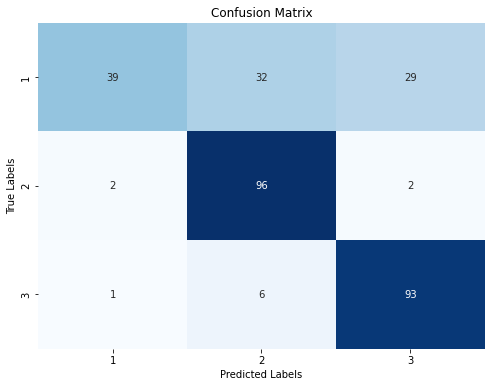

In [64]:
conf_matrix=confusion_matrix(sampled_df['RLabel'], sampled_df['y_pred'])
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set the tick labels to match your class labels (1, 2, 3)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=[1, 2, 3])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=[1, 2, 3])

plt.show()

In [65]:
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV4/V4_Labeled_300_sampled.json', orient='records')
remaining_df.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV4/V4_Labeled_744_remaining.json', orient='records')

# MERGE with previous labeled set

In [21]:
V1Labels = pd.read_csv('/home/ravi/raviProject/DATA/Annotate/LabelV1/v1labeldf_V1_with_external_Labels.csv')
print(V1Labels['FinalLabel'].value_counts(), len(V1Labels))
V1Labels.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V1_10K_Experts_Sampled487WithMattnRavi.json', orient='records')


1    207
3    171
2    109
Name: FinalLabel, dtype: int64 487


In [16]:
V2GPT=pd.read_json('/home/ravi/raviProject/DATA/Annotate/sampled_V2_10K_yPred_RoBERTa_Sampled1500WithYpred.json', orient='records')
# Replace values in column 'FinalLabel'
replacement_dict = {0 : 1, 1 : 2, 2 : 3}
V2GPT['y_pred'] = V2GPT['y_pred'].replace(replacement_dict)
V2Ravi=pd.read_csv('/home/ravi/raviProject/DATA/Annotate/LabelV2/sampled_V2_10K_yPred_RoBERTa_Sampled1500WithoutYpred_RaviLabel.csv')
V2Labels=V2GPT.copy()
V2Labels['RLabel']=V2Ravi['Rlabel']
V2Labels = V2Labels.dropna(subset=['RLabel'], axis=0)
V2Labels['RLabel']=V2Labels['RLabel'].astype('int64')
print(V2Labels['RLabel'].value_counts(), len(V2Labels))
V2Labels.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V2_10K_yPred_RoBERTa_Sampled1457WithYprednRavi.json', orient='records')


1    1185
2     152
3     120
Name: RLabel, dtype: int64 1457


In [18]:
V3GPT=pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV3/sampled_V3_10K_yPred_RoBERTa_Sampled1412WithYpred.json', orient='records')
# Replace values in column 'FinalLabel'
replacement_dict = {0 : 1, 1 : 2, 2 : 3}
V3GPT['y_pred'] = V3GPT['y_pred'].replace(replacement_dict)
V3Ravi=pd.read_csv('/home/ravi/raviProject/DATA/Annotate/LabelV3/sampled_V3_10K_yPred_RoBERTa_Sampled1412WithoutYpred_RaviLabel.csv')
V3Labels=V3GPT.copy()
V3Labels['RLabel']=V3Ravi['LabelRavi']
V3Labels = V3Labels.dropna(subset=['RLabel'], axis=0)
V3Labels['RLabel']=V3Labels['RLabel'].astype('int64')
print(V3Labels['RLabel'].value_counts(), len(V3Labels))
V3Labels.to_json('/home/ravi/raviProject/DATA/Annotate/sampled_V3_10K_yPred_RoBERTa_Sampled1404WithYprednRavi.json', orient='records')

1    1094
3     176
2     134
Name: RLabel, dtype: int64 1404


### combine all - full labeled set

In [3]:
V1Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV1/sampled_V1_10K_Experts_Sampled487WithMattnRavi.json', orient='records')
V2Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV2/sampled_V2_10K_yPred_RoBERTa_Sampled1457WithYprednRavi.json', orient='records')
V3Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV3/sampled_V3_10K_yPred_RoBERTa_Sampled1404WithYprednRavi.json', orient='records')
V4Labels = pd.read_json('/home/ravi/raviProject/DATA/Annotate/LabelV4/sampled_V4_10K_yPred_RoBERTa_Sampled1044WithYprednRavi.json', orient='records')

In [4]:
V2Labels.rename(columns={'RLabel': 'FinalLabel'}, inplace=True)
V3Labels.rename(columns={'RLabel': 'FinalLabel'}, inplace=True)
V4Labels.rename(columns={'RLabel': 'FinalLabel'}, inplace=True)

In [5]:
print(V1Labels.shape, '\n', V1Labels['FinalLabel'].value_counts())
print(V2Labels.shape, '\n', V2Labels['FinalLabel'].value_counts())
print(V3Labels.shape, '\n', V3Labels['FinalLabel'].value_counts())
print(V4Labels.shape, '\n', V4Labels['FinalLabel'].value_counts())

(487, 13) 
 1    207
3    171
2    109
Name: FinalLabel, dtype: int64
(1457, 7) 
 1    1185
2     152
3     120
Name: FinalLabel, dtype: int64
(1404, 7) 
 1    1094
3     176
2     134
Name: FinalLabel, dtype: int64
(1044, 7) 
 1    746
3    162
2    136
Name: FinalLabel, dtype: int64


In [6]:
selected_cols =['msgDate', 'msg', 'replyDate', 'text', 'telegramChannel', 'FinalLabel']
merged_df = pd.concat([V1Labels[selected_cols], V2Labels[selected_cols], 
                       V3Labels[selected_cols], V4Labels[selected_cols]], ignore_index=True)

In [7]:
# Replace values in column 'FinalLabel'
replacement_dict = {1 : 0, 2 : 1, 3 : 2}
merged_df['FinalLabel'] = merged_df['FinalLabel'].replace(replacement_dict)

In [8]:
merged_df.shape

(4392, 6)

In [9]:
merged_df['FinalLabel'].value_counts()

0    3232
2     629
1     531
Name: FinalLabel, dtype: int64

In [10]:
shuffled_df = merged_df.sample(frac=1, random_state=42)  # Shuffle the DataFrame

In [11]:
shuffled_df.head()

,msgDate,msg,replyDate,text,telegramChannel,FinalLabel
4159,1619540214,Hunter Biden laptop update is bad news for Joe...,1619541628,Who is going to hold him accountable? Just lik...,AnalyzingAmerica.json,0
3610,1670879296,,1671021689,"Bari Weiss, another dirty conniving Jew, needs...",DonaldTrumpJr.json,1
1769,1647208396,W h o c a r e s t h a t R e n e g a d e ...,1647215334,Covid pos = Gitmo,ThePatriotVoice.json,0
414,1667325765,🔴 18-Year-Old Cheerleader Dies Suddenly; Caus...,1667325928,Hmmmm jabbed up??? What a sin.,ResisttheMainstream.json,0
3855,1670790004,🔴 State House Race Flips to Democrat By One V...,1670790151,"Give it up, America. They have their claws in ...",ResisttheMainstream.json,0


In [13]:
shuffled_df.to_json('/home/ravi/raviProject/DATA/Annotate/iterData/iter4_Labeled_4392_sampled.json', orient='records')

## make new iter4 labeled data

In [3]:
df5 = pd.read_json('/home/ravi/raviProject/DATA/Annotate/iterData/iter_Labeled_4392_sampled.json', orient='records')

In [4]:
df5['FinalLabel'].value_counts()

0    3232
2     629
1     531
Name: FinalLabel, dtype: int64

In [6]:
# Sample 100 rows with class 1
sample_class_1 = df5[df5['FinalLabel'] == 0].sample(n=629, random_state=42)

# Sample 200 rows with class 2
sample_class_2 = df5[df5['FinalLabel'] == 1].sample(n=531, random_state=42)

# Sample 400 rows with class 3
sample_class_3 = df5[df5['FinalLabel'] == 2].sample(n=629, random_state=42)

# Concatenate the sampled dataframes
sampled_df = pd.concat([sample_class_1, sample_class_2, sample_class_3])

# Shuffle the dataframe
sampled_df = sampled_df.sample(frac=1, random_state=42)

# Drop the sampled rows from the original DataFrame to get the remaining rows
remaining_data = df5.drop(sampled_df.index)

In [7]:
len(sampled_df), len(remaining_data)

(1789, 2603)

In [9]:
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV4/V4_Labeled_1789_sampled.json', orient='records')
remaining_data.to_json('/home/ravi/raviProject/DATA/Annotate/LabelV4/V4_Labeled_2603_remaining.json', orient='records')

In [10]:
sampled_df.to_json('/home/ravi/raviProject/DATA/Annotate/iterData/iter4_Labeled_1789_sampled.json', orient='records')